In [73]:
import pandas as pd
from db_utils import QueryAll
import numpy as np
import matplotlib.pyplot as plt
# Wall clock data
data_clocks = QueryAll("clock_uk")

# Harry Potter book data
data_books = QueryAll("book_uk")

cols = ["id", "title", "globalId", "categoryId", "categoryName", "url", "location", "shippingType", "shippingLocations",
                "shippingTime", "startTime", "endTime", "returnsAccepted", "conditionId", "listingIsTopRated", 
                "sellerFeedbackScore", "sellerPositivePercent", "sellerName", "sellerIsTopRated", "price", "currency", "bids"]

clocks = pd.DataFrame(data_clocks, columns=cols)
books = pd.DataFrame(data_books, columns=cols)

df_clocks = clocks[(clocks.bids != -1) & (clocks.bids != -2)].reset_index()
df_books = books[(books.bids != -1) & (books.bids != -2)].reset_index()


##I want to see which month is the most popular
book_day_freq = {}
book_hour_freq = {}


for i in range(len(df_books)):
    temp_day = df_books['endTime'][i][8:10]
    if temp_day in book_day_freq:
        book_day_freq[temp_day] += 1
    else:
        book_day_freq[temp_day] = 1
    
for i in range(len(df_books)):
    hour = df_books['endTime'][i][10:13]
    if hour in book_hour_freq:
        book_hour_freq[hour] += 1
    else:
        book_hour_freq[hour] = 1

bk_cond_1000 = 0
bk_cond_3000 = 0
bk_cond_7000 = 0
for x in df_books['conditionId']:
    if x == 1000:
        bk_cond_1000 += 1
    elif x == 3000:
        bk_cond_3000 += 1
    elif x == 7000:
        bk_cond_7000 += 1
        
clock_day_freq = {}
clock_hour_freq = {}


for i in range(len(df_clocks)):
    temp_day = df_clocks['endTime'][i][8:10]
    if temp_day in clock_day_freq:
        clock_day_freq[temp_day] += 1
    else:
        clock_day_freq[temp_day] = 1
    
for i in range(len(df_clocks)):
    hour = df_clocks['endTime'][i][10:13]
    if hour in clock_hour_freq:
        clock_hour_freq[hour] += 1
    else:
        clock_hour_freq[hour] = 1

ck_cond_1000 = 0
ck_cond_3000 = 0
ck_cond_7000 = 0
for x in df_clocks['conditionId']:
    if x == 1000:
        ck_cond_1000 += 1
    elif x == 3000:
        ck_cond_3000 += 1
    elif x == 7000:
        ck_cond_7000 += 1
        


        

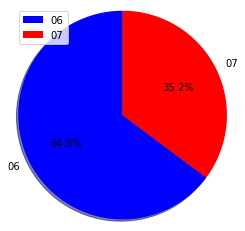

In [79]:
# defining labels
labels = []
slices = []
for i in book_day_freq.keys():
    labels.append(i)
    slices.append(book_day_freq[i])
  
# color for each label
colors = ['b', 'r', 'y', 'g', 'b']
  
# plotting the pie chart
plt.pie(slices, labels = labels, colors=colors, 
        startangle=90, shadow = True,
        radius = 1.2, autopct = '%1.1f%%')
  
# plotting legend
plt.legend()
  
# showing the plot
plt.show()

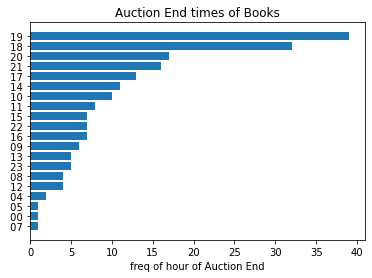

In [83]:
sorted_hours = sorted(book_hour_freq.items(), key=lambda x:x[1])

labs = []
value = []
pos = []
i = 0
for pair in sorted_hours:
    labs.append(pair[0])
    value.append(pair[1])
    pos.append(i)
    i += 1

plt.barh(pos, value, align='center')
plt.yticks(pos, labs)
plt.xlabel("freq of hour of Auction End")
plt.title("Auction End timesa of Books")
plt.show()

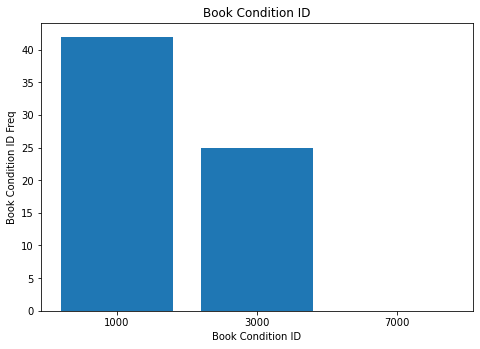

In [89]:
bk_condition = plt.figure()
ax = bk_condition.add_axes([0,0,1,1])
langs = ['1000', '3000', '7000']
students = [bk_cond_1000, bk_cond_3000, bk_cond_7000]
ax.bar(langs,students)
plt.xlabel("Book Condition ID")
plt.ylabel("Book Condition ID Freq")
plt.title("Graph of Freq of Books Condition ID")

plt.show()

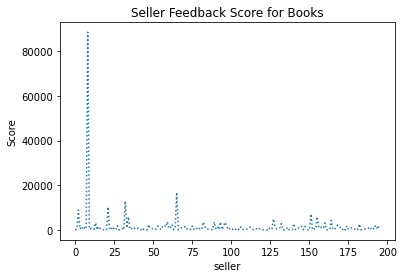

In [93]:
ypoints = df_books["sellerFeedbackScore"]
plt.title('Seller Feedback Score for Books')
plt.ylabel('Score')
plt.xlabel('seller')
plt.plot(ypoints, linestyle = 'dotted')
plt.show()

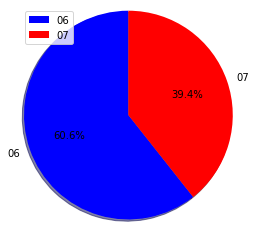

In [78]:
# defining labels
labels = []
slices = []
for i in clock_day_freq.keys():
    labels.append(i)
    slices.append(clock_day_freq[i])
  
# color for each label
colors = ['b', 'r', 'y', 'g', 'b']
  
# plotting the pie chart
plt.pie(slices, labels = labels, colors=colors, 
        startangle=90, shadow = True,
        radius = 1.2, autopct = '%1.1f%%')
  
# plotting legend
plt.legend()
  
# showing the plot
plt.show()

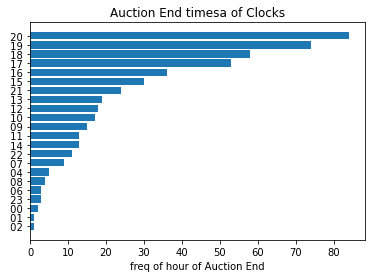

In [84]:
sorted_hours = sorted(clock_hour_freq.items(), key=lambda x:x[1])

labs = []
value = []
pos = []
i = 0
for pair in sorted_hours:
    labs.append(pair[0])
    value.append(pair[1])
    pos.append(i)
    i += 1

plt.barh(pos, value, align='center')
plt.yticks(pos, labs)
plt.xlabel("freq of hour of Auction End")
plt.title("Auction End timesa of Clocks")
plt.show()

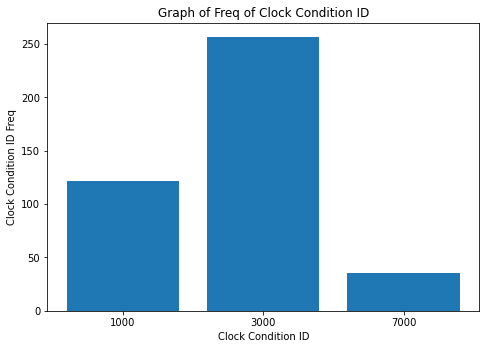

In [91]:
ck_condition = plt.figure()
ax = ck_condition.add_axes([0,0,1,1])
langs = ['1000', '3000', '7000']
students = [ck_cond_1000, ck_cond_3000, ck_cond_7000]
ax.bar(langs,students)
plt.xlabel("Clock Condition ID")
plt.ylabel("Clock Condition ID Freq")
plt.title("Graph of Freq of Clock Condition ID")

plt.show()

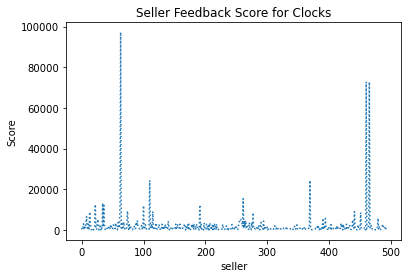

In [95]:
ypoints = df_clocks["sellerFeedbackScore"]
plt.title('Seller Feedback Score for Clocks')
plt.ylabel('Score')
plt.xlabel('seller')
plt.plot(ypoints, linestyle = 'dotted')
plt.show()